Assignment - 3 (AI ML)

Name    : Sushil Krishnan

Reg. No.: 21BCE3009

Mail    : sushil.krishnan2021@vitstudent.ac.in

**Colab Link: https://colab.research.google.com/drive/13MHUMz15TB1zTN-Q52_ATceRnQBT9PeN?usp=sharing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task - 1 Download the dataset.


Task - 2 Load the dataset.

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Task - 3 Perform the Below Visualizations.
* Univariate Analysis
* Bi - Variate Analysis
* Multivariate Analysis


Univariate Analysis

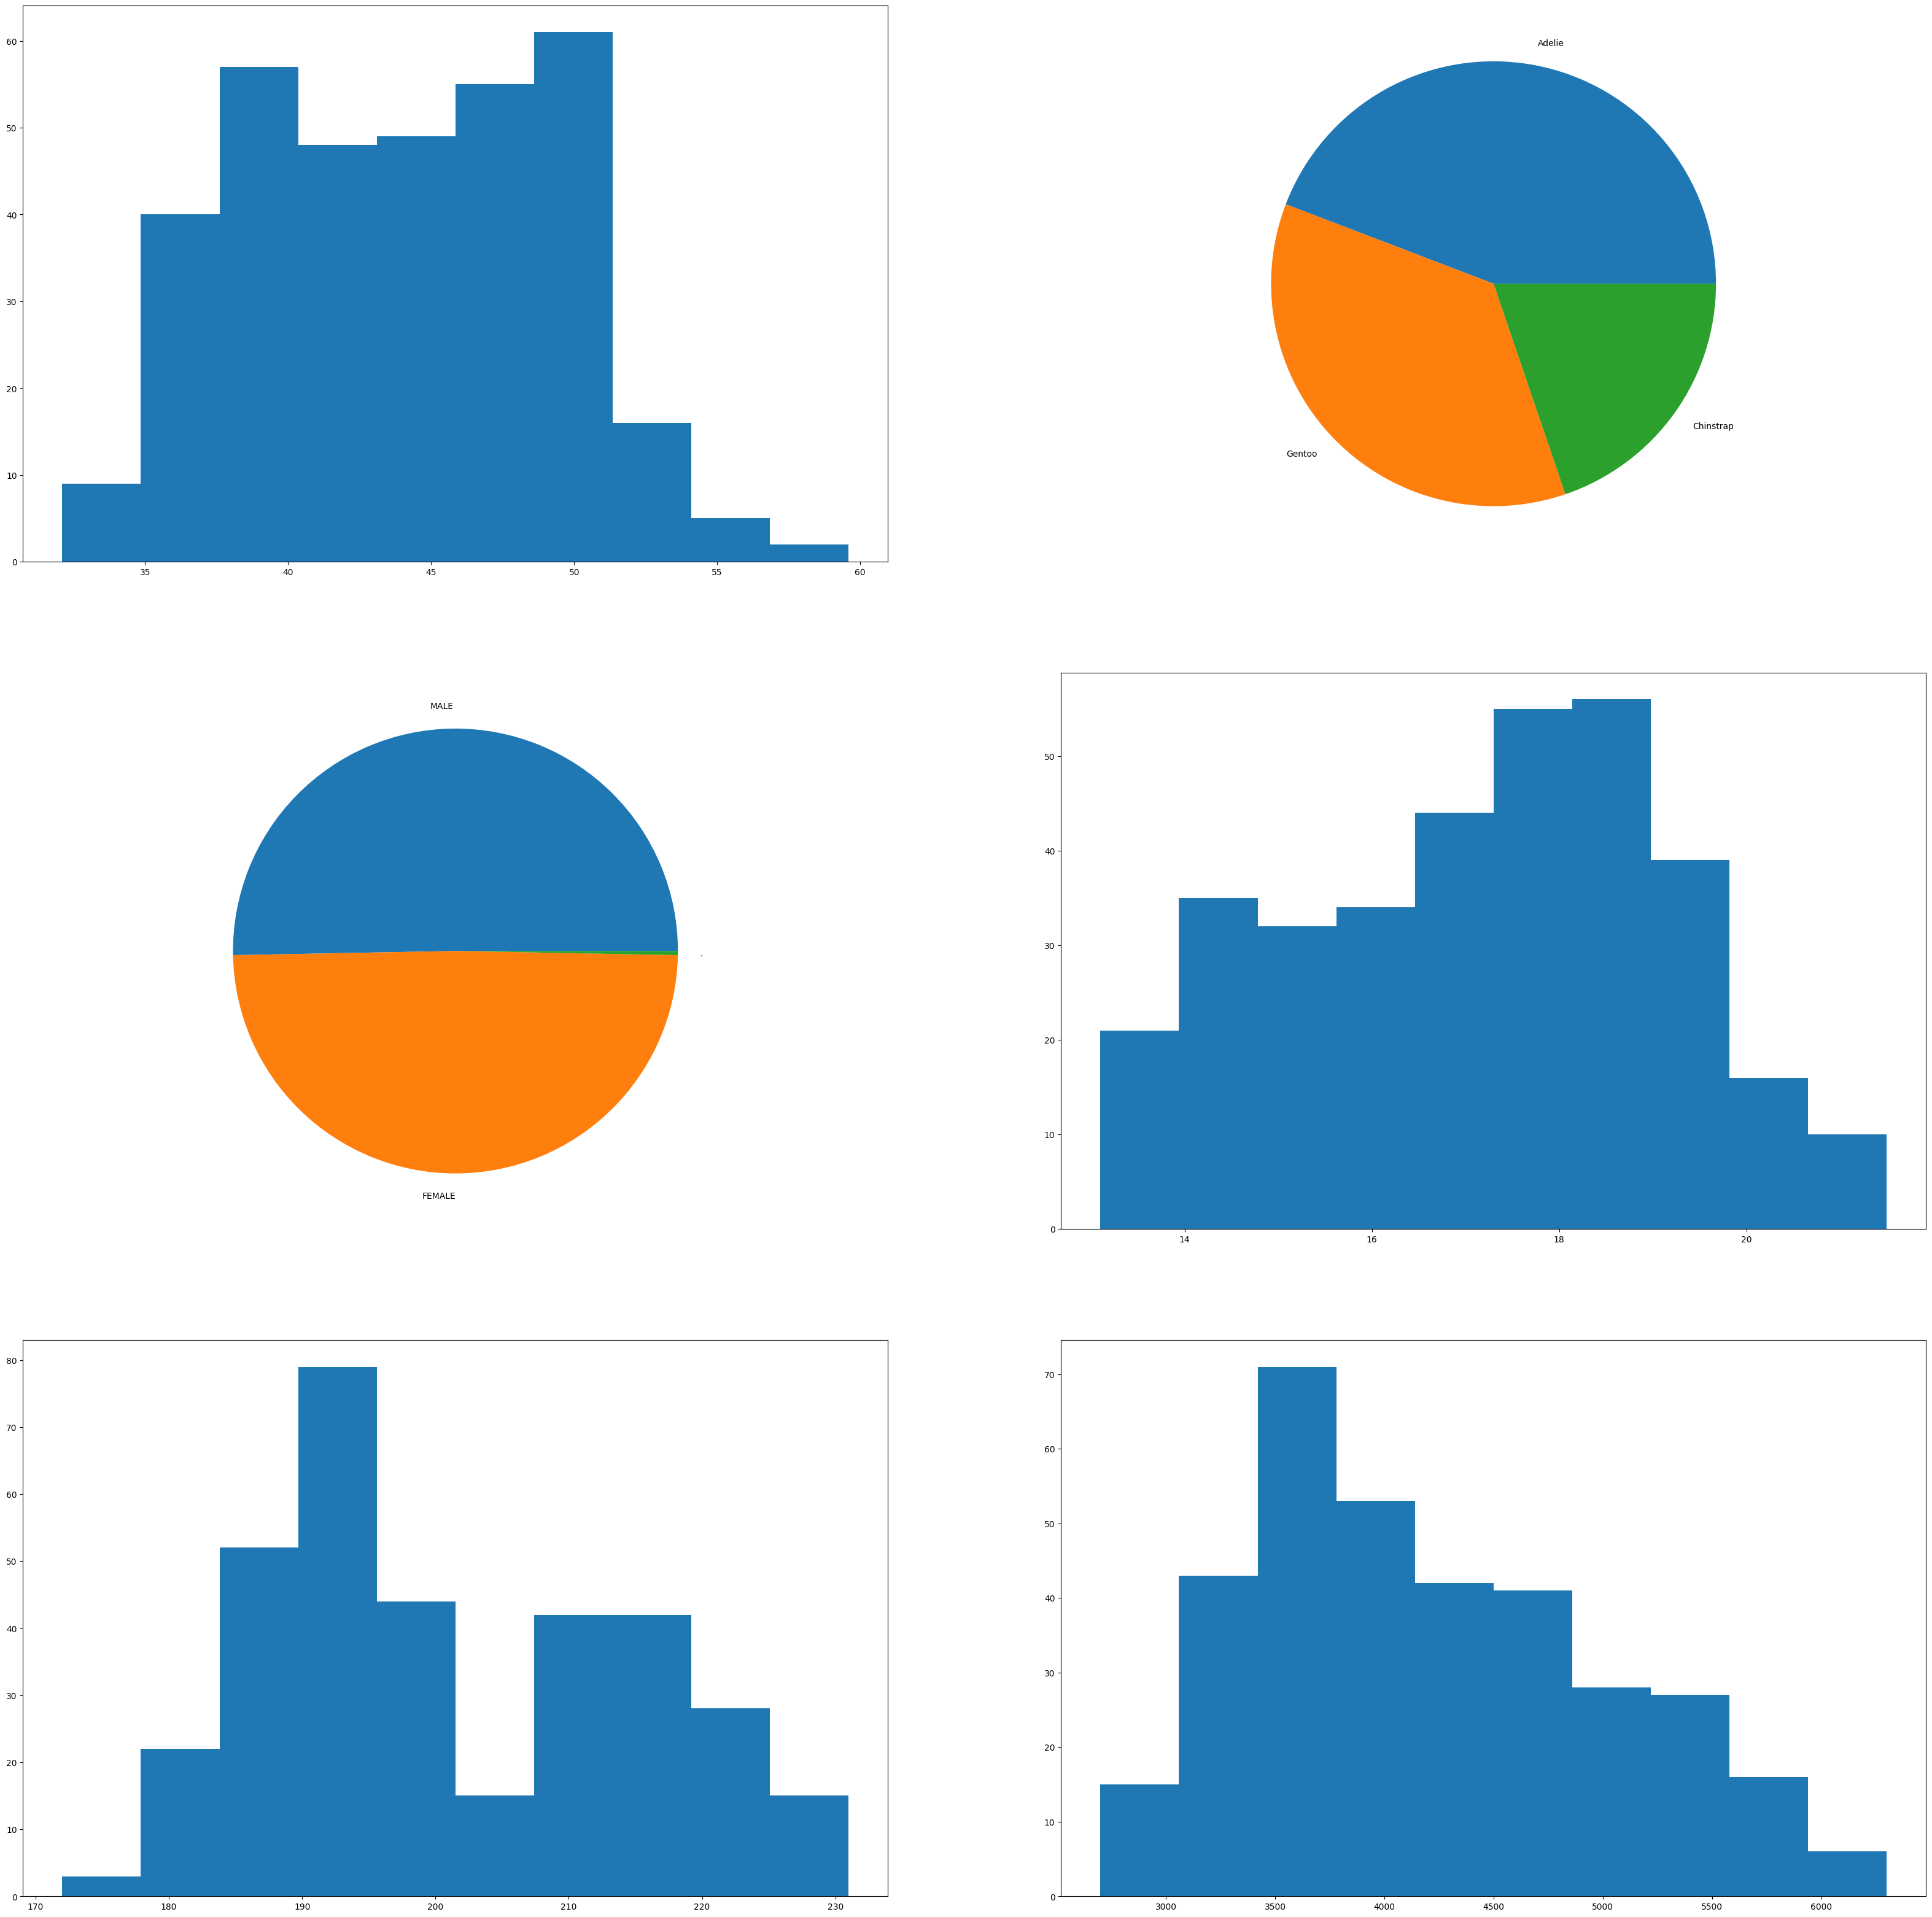

In [11]:
plt.rcParams['figure.figsize'] = [40, 40]
fig,ax = plt.subplots(3,2)
ax[0,0].hist(df['culmen_length_mm'])
ax[0,1].pie(df['species'].value_counts(), labels=df['species'].value_counts().index)
ax[1,0].pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index)
ax[1,1].hist(df['culmen_depth_mm'])
ax[2,0].hist(df['flipper_length_mm'])
ax[2,1].hist(df['body_mass_g'])
plt.show()

Bi - Variate Analysis

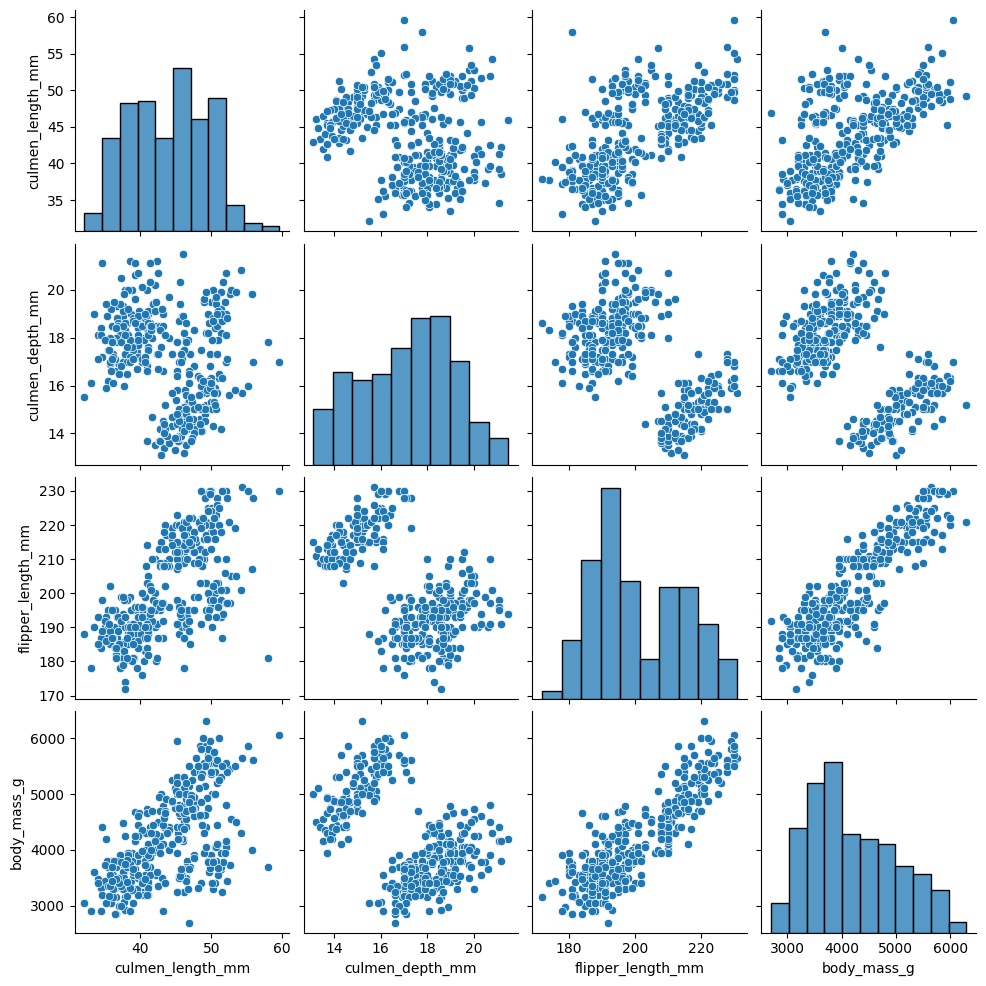

In [12]:
sns.pairplot(df)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

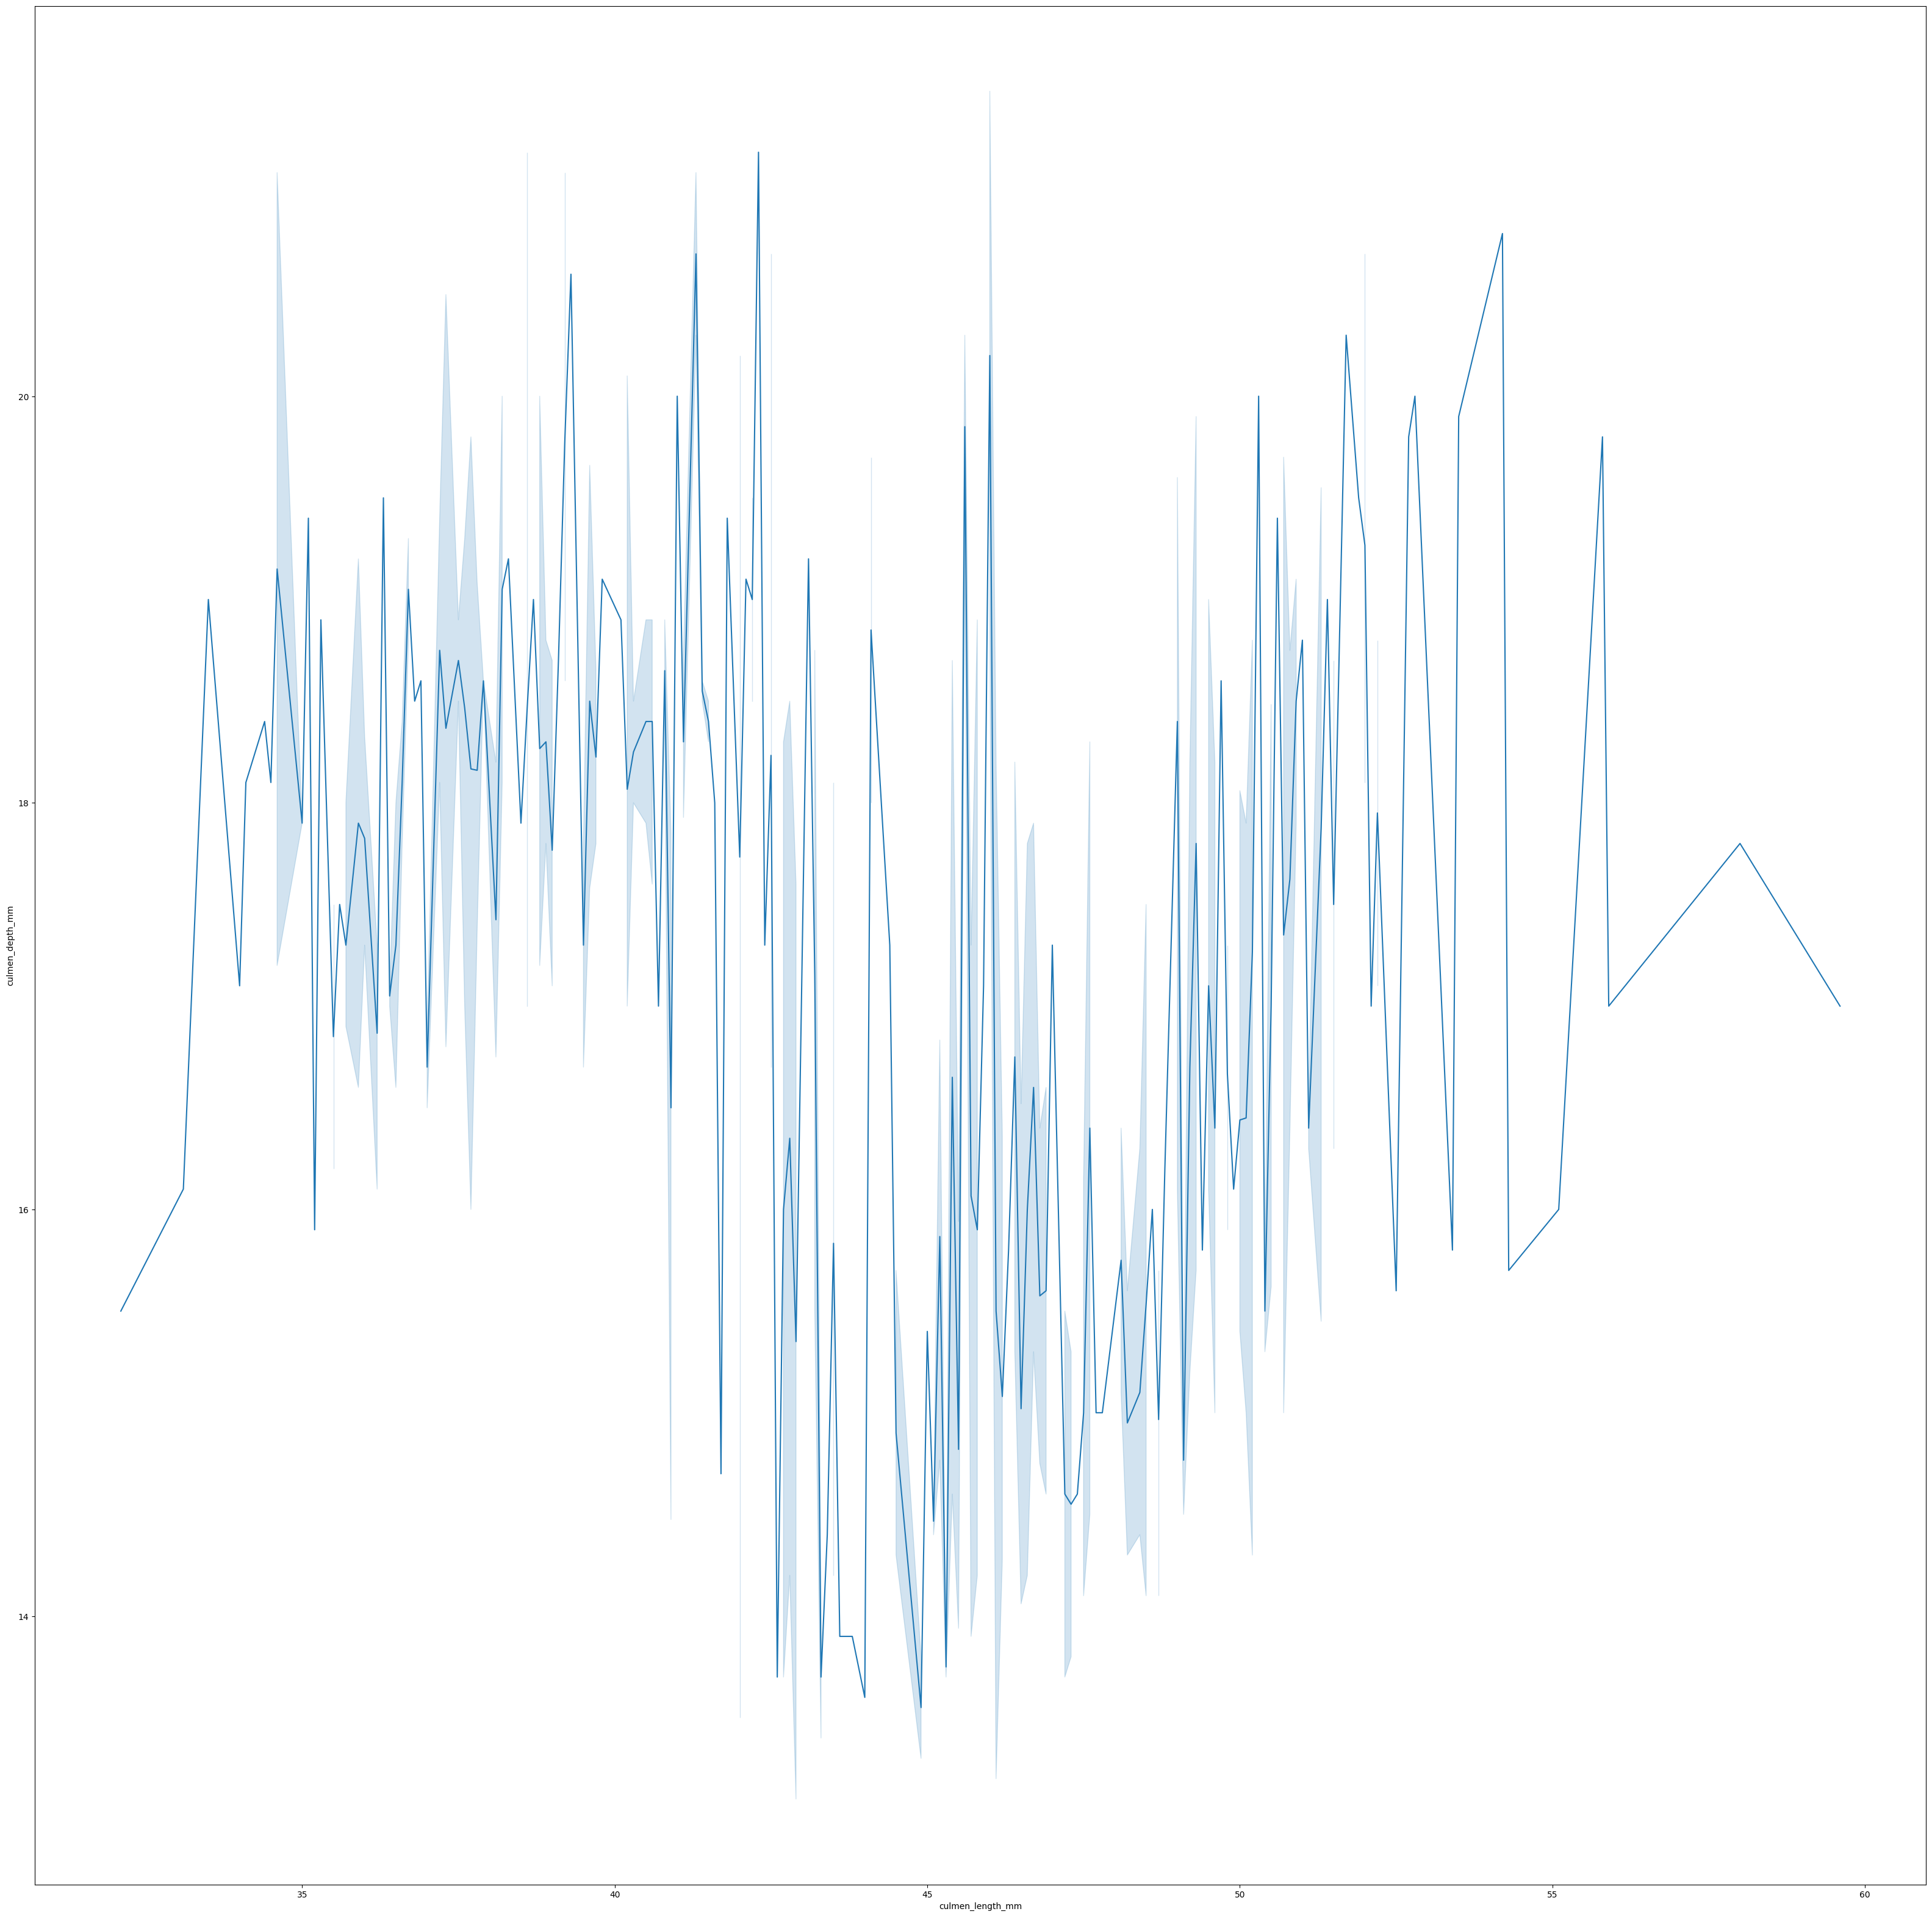

In [13]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

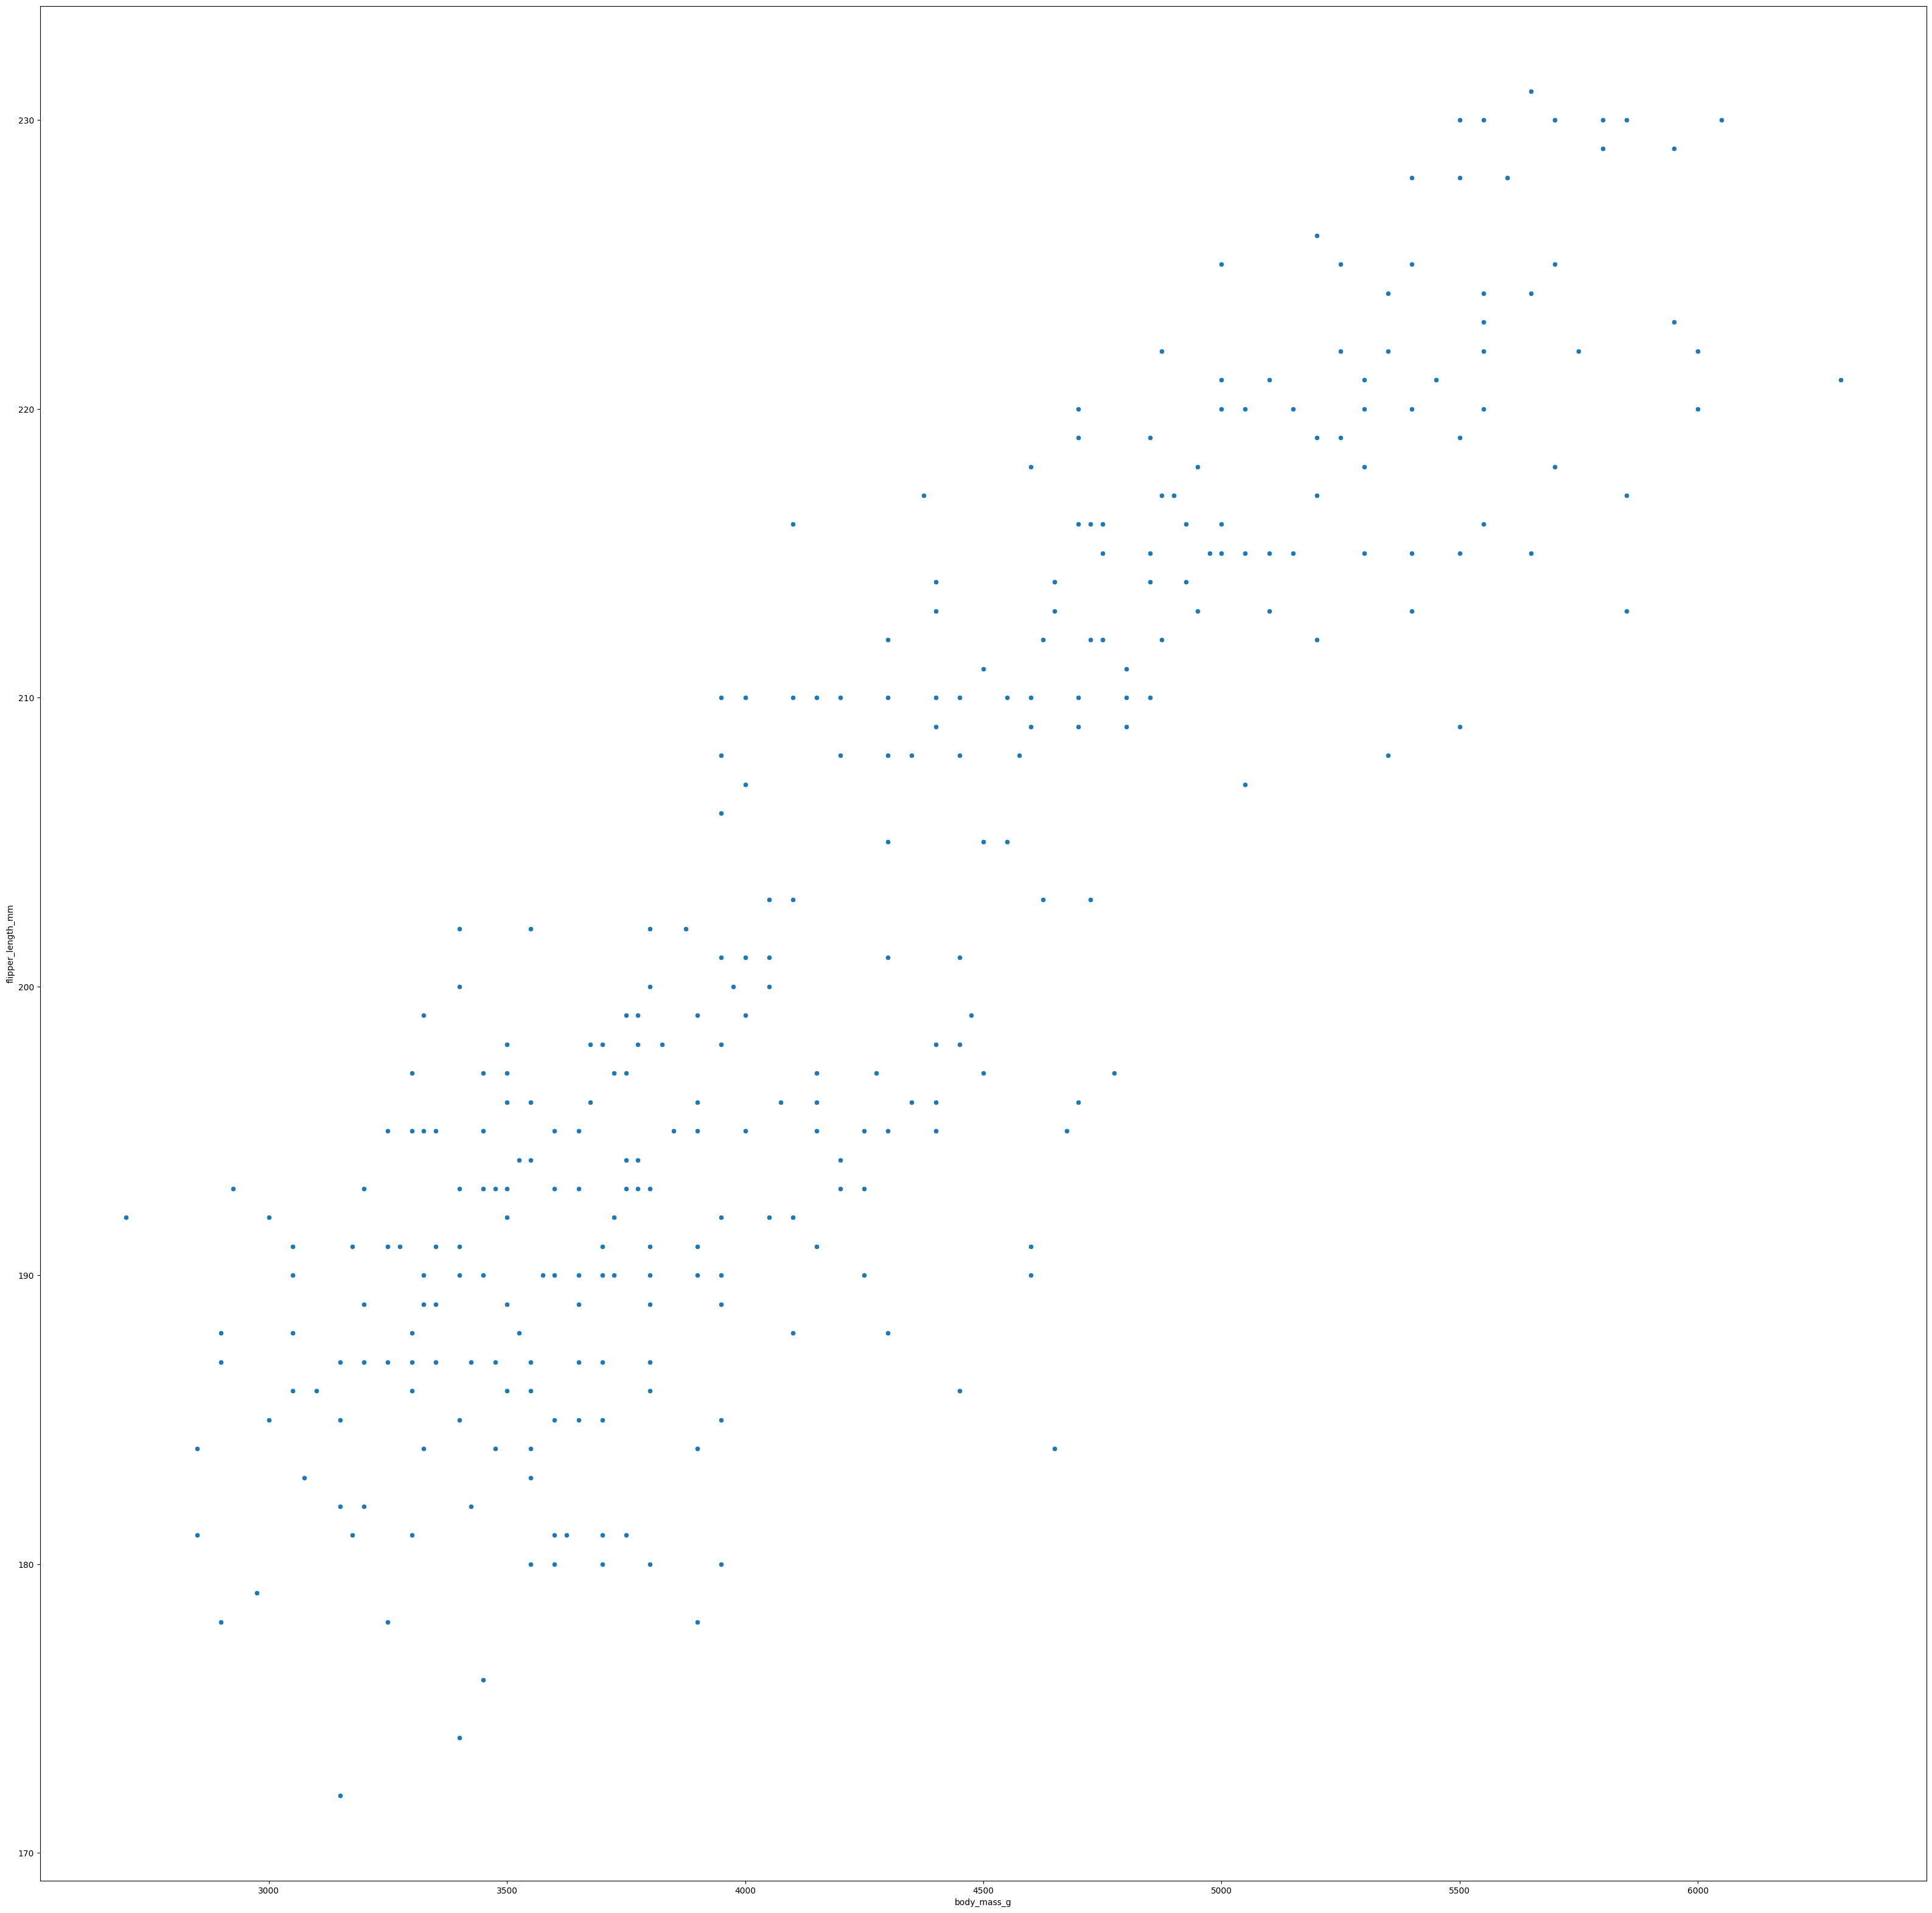

In [14]:
sns.scatterplot(x=df.body_mass_g,y=df.flipper_length_mm)

Multivariate Analysis

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

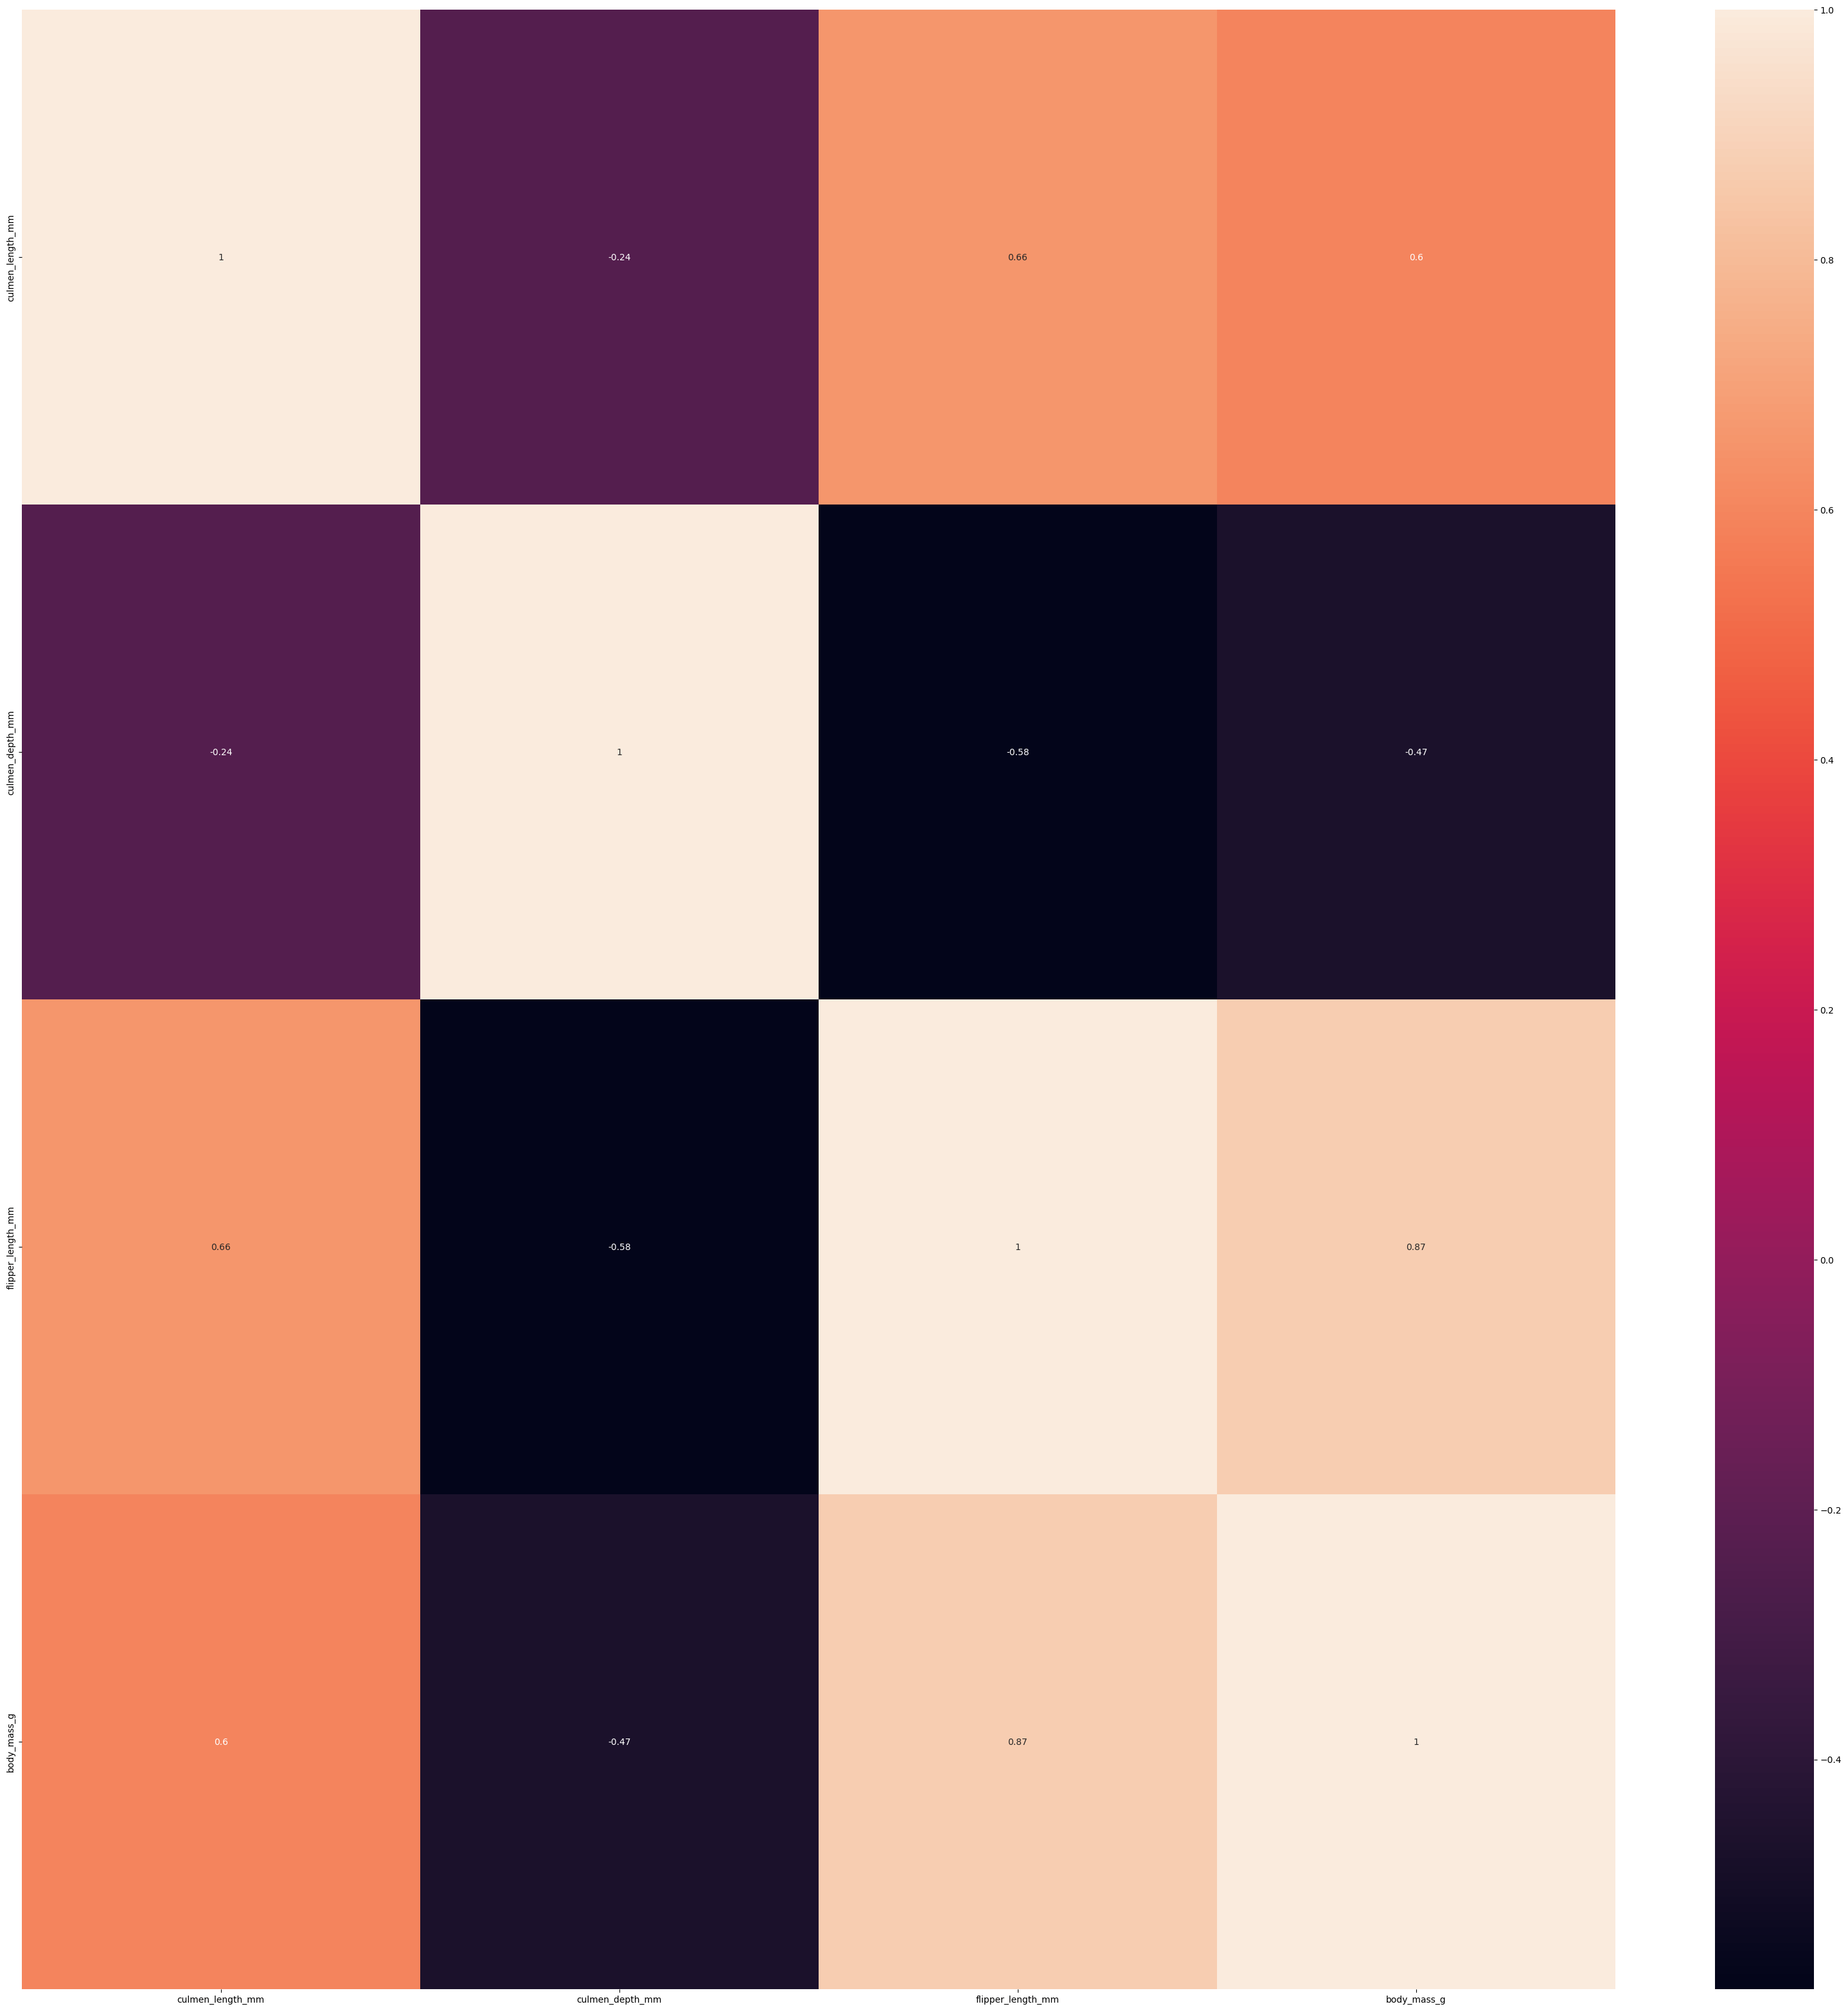

In [15]:
sns.heatmap(df.corr(),annot=True)

Task - 4 Perform descriptive statistics on the dataset.

In [17]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Task - 5 Handle the Missing values.

In [19]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [24]:
#replace null in culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g with median
#replace null in sex with mode
df['culmen_length_mm'].fillna((df['culmen_length_mm'].median()),inplace=True)
df['culmen_depth_mm'].fillna((df['culmen_depth_mm'].median()),inplace=True)
df['flipper_length_mm'].fillna((df['flipper_length_mm'].median()),inplace=True)
df['body_mass_g'].fillna((df['body_mass_g'].median()),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [25]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

Task - 6 Handle the Outliers.

<Axes: >

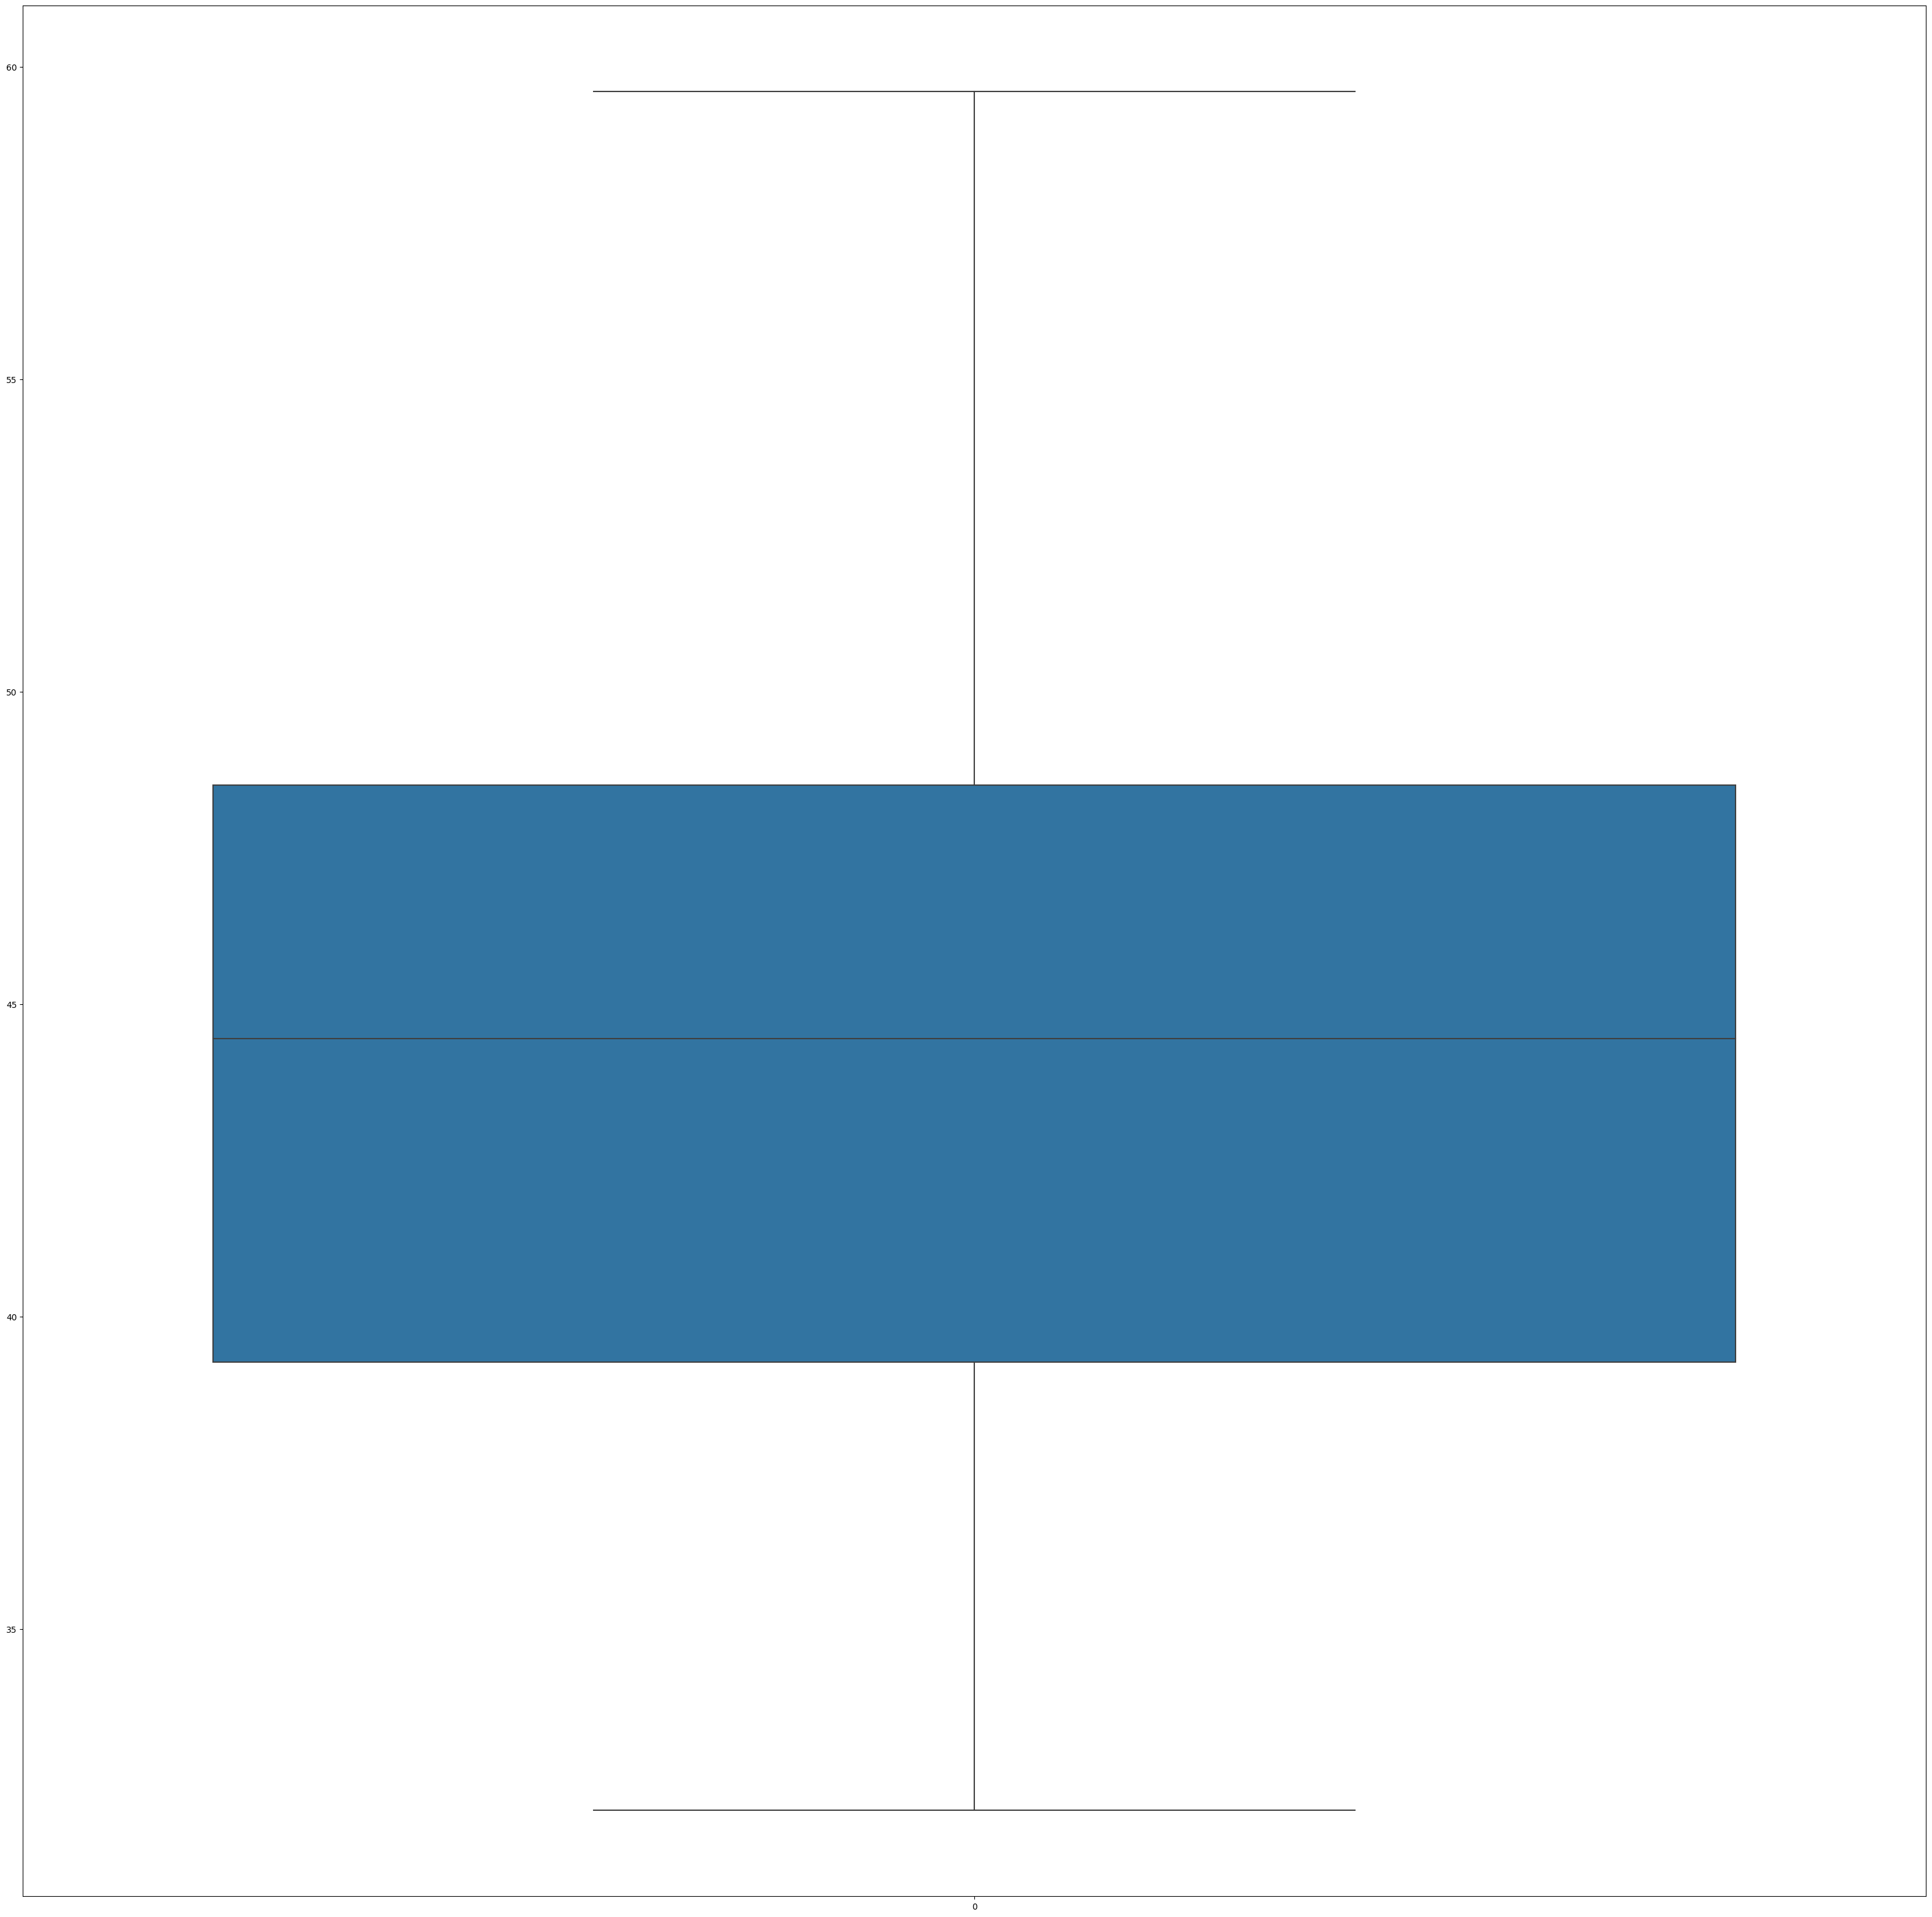

In [26]:
sns.boxplot(df.culmen_length_mm)    #No outliers

<Axes: >

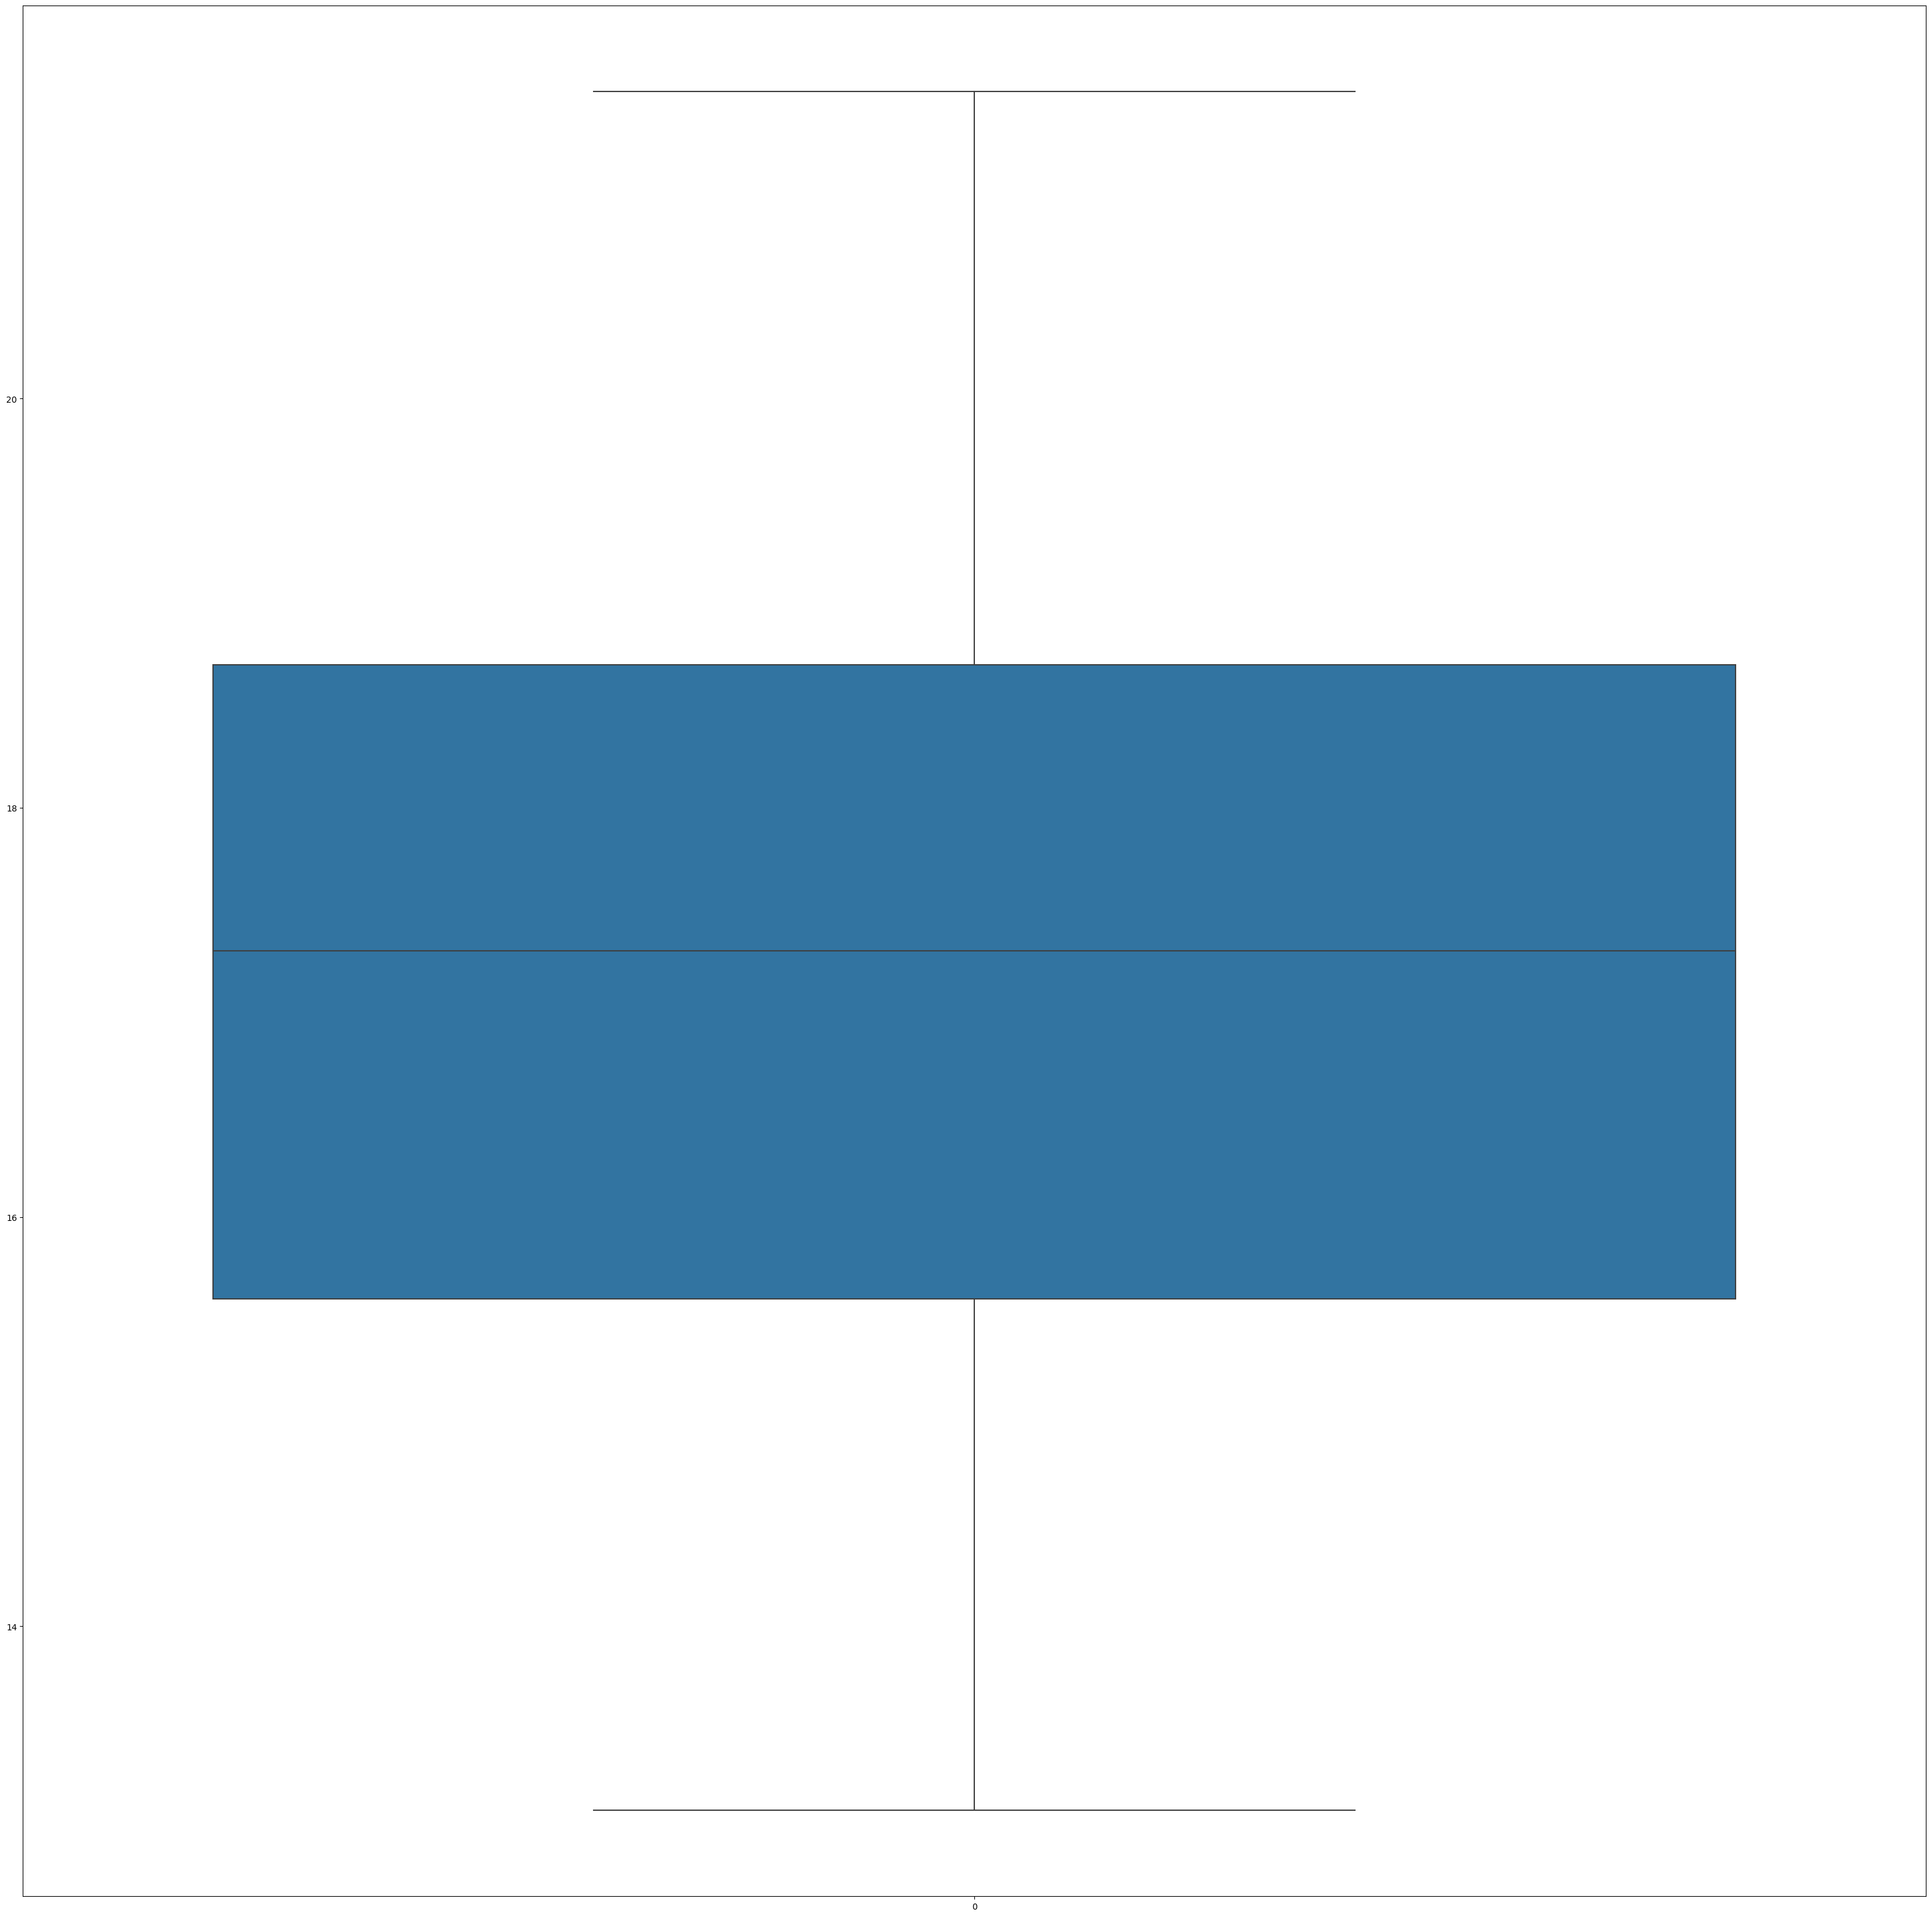

In [27]:
sns.boxplot(df.culmen_depth_mm)    #No outliers

<Axes: >

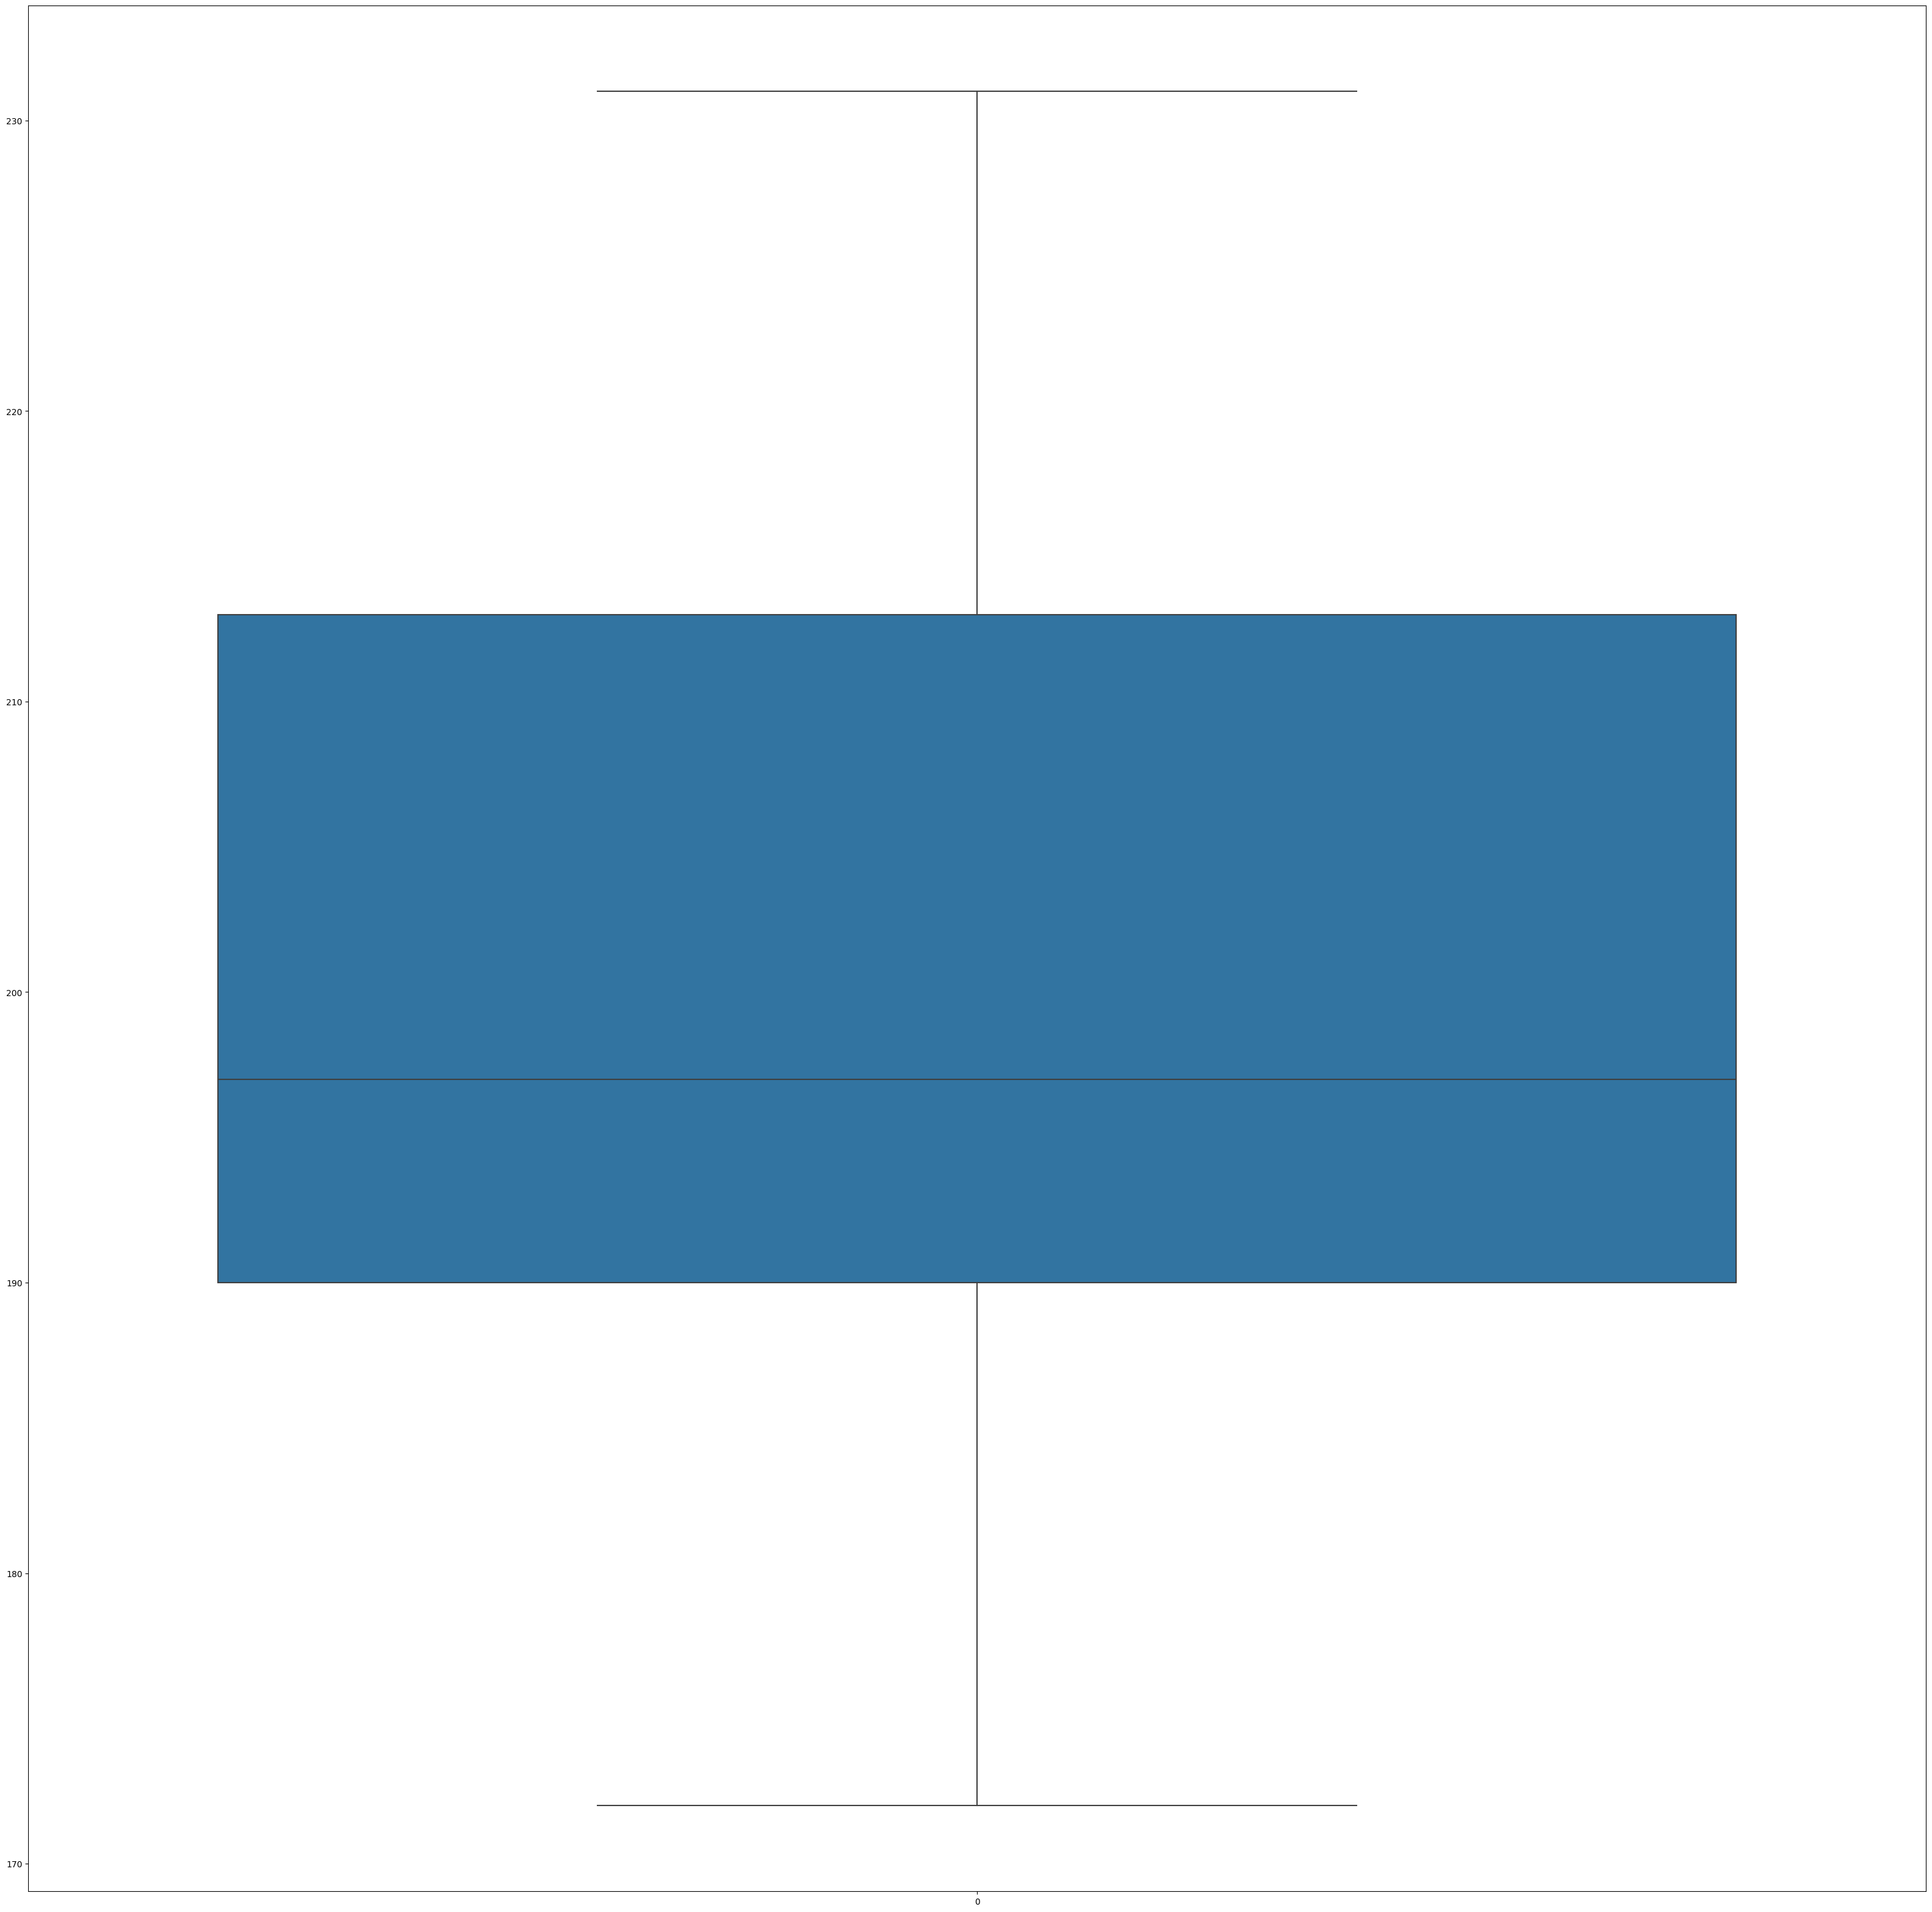

In [28]:
sns.boxplot(df.flipper_length_mm)    #No outliers

<Axes: >

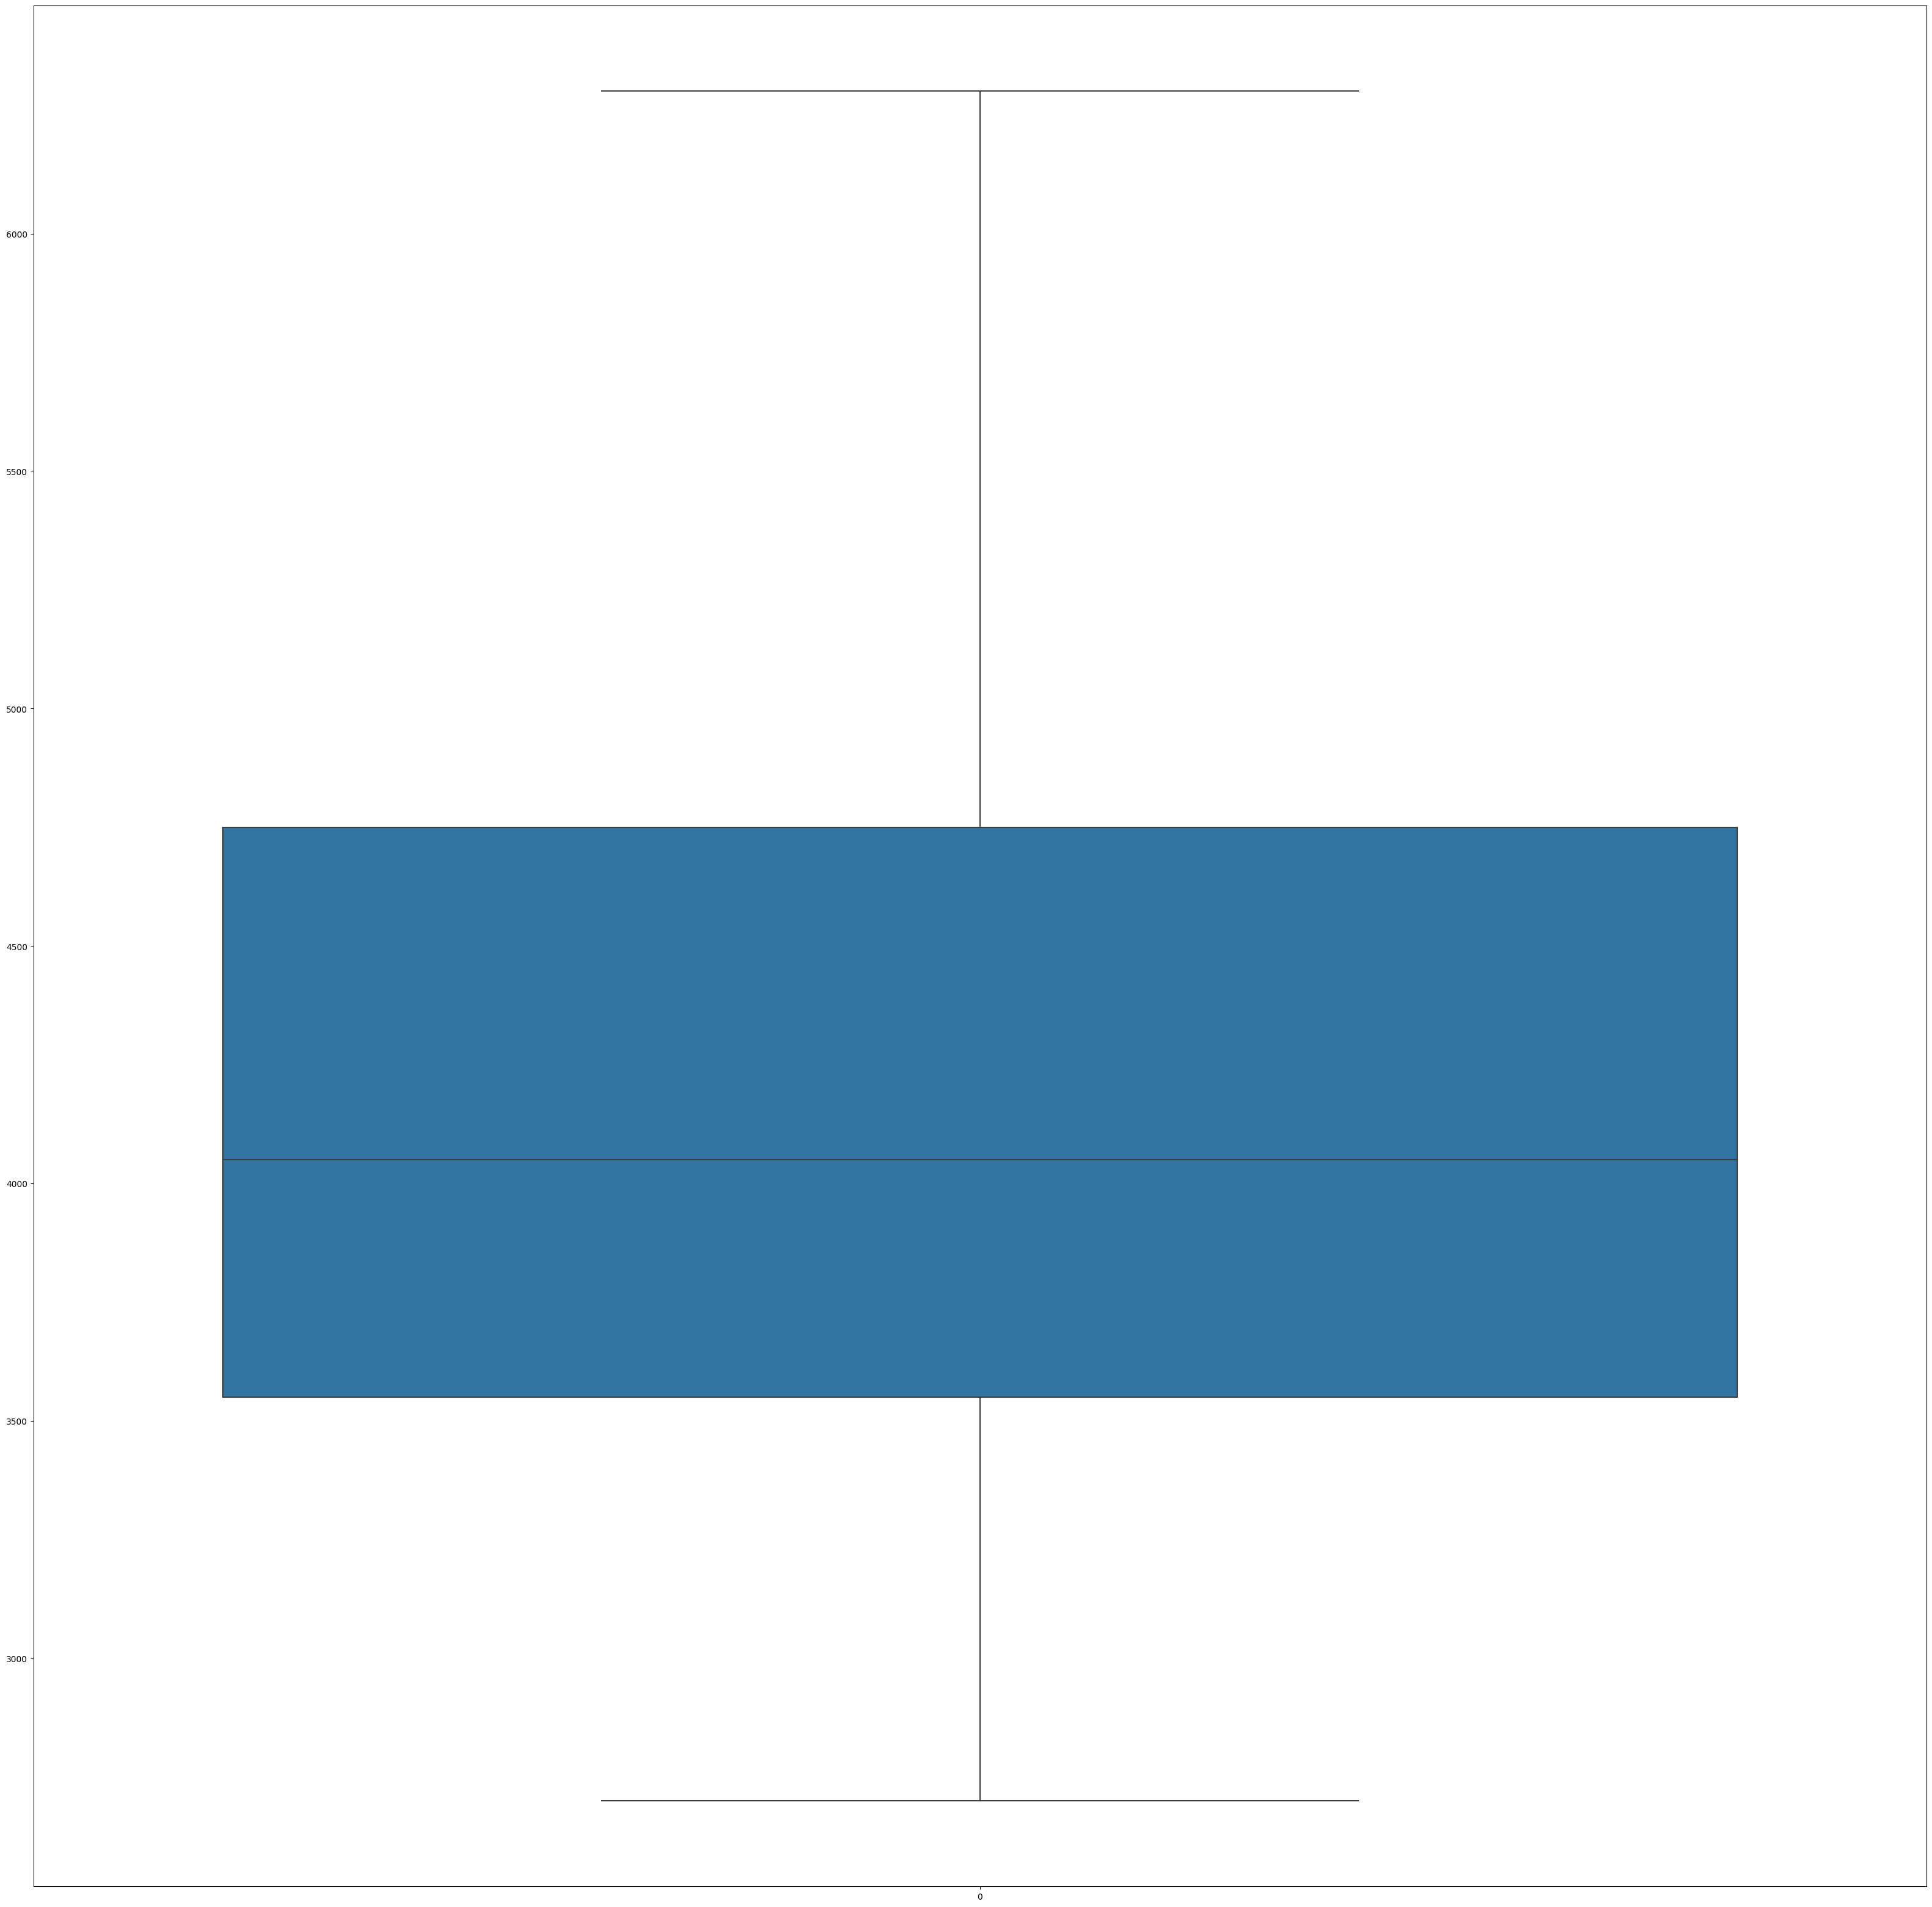

In [29]:
sns.boxplot(df.body_mass_g)    #No outliers

Task - 8 Check for Categorical columns and perform encoding.

In [33]:
#performed before checking correlation, target is categorical
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,2,0,44.45,17.3,197.0,4050.0,2
340,2,0,46.80,14.3,215.0,4850.0,1
341,2,0,50.40,15.7,222.0,5750.0,2
342,2,0,45.20,14.8,212.0,5200.0,1


Task - 7 Correlation of independent variables with the target.

In [34]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

Task - 9 Split the data into dependent and independent variables.

In [35]:
x = df.drop(columns=["species"], axis = 1)
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1
...,...,...,...,...,...,...
339,0,44.45,17.3,197.0,4050.0,2
340,0,46.80,14.3,215.0,4850.0,1
341,0,50.40,15.7,222.0,5750.0,2
342,0,45.20,14.8,212.0,5200.0,1


In [36]:
y = df.species
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

Task - 10 Scaling the data

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scale = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
x_scale

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5
...,...,...,...,...,...,...
339,0.0,0.449091,0.500000,0.423729,0.375000,1.0
340,0.0,0.534545,0.142857,0.728814,0.597222,0.5
341,0.0,0.665455,0.309524,0.847458,0.847222,1.0
342,0.0,0.476364,0.202381,0.677966,0.694444,0.5


Task - 11 Split the data into training and testing.

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.3,random_state=0)

Task - 12 Check the training and testing data shape.

In [40]:
x_train.shape

(240, 6)

In [41]:
x_test.shape

(104, 6)